In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Climate Data**

In [ ]:
# Membaca Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Khakang/Climate-Data-Daily-IDN/climate/climate_data.csv')
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [ ]:
# Cek Data Kosong
df.isnull()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
589260,False,False,False,False,False,False,False,False,False,False,False,False
589261,False,False,False,False,False,True,False,False,False,False,False,False
589262,False,False,False,False,False,True,False,False,False,False,False,False
589263,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Menjumlahkan Data Kosong
df.isnull().sum()

date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64

In [ ]:
df.dtypes

date           object
Tn            float64
Tx            float64
Tavg          float64
RH_avg        float64
RR            float64
ss            float64
ff_x          float64
ddd_x         float64
ff_avg        float64
ddd_car        object
station_id      int64
dtype: object

In [ ]:
# Mengubah NaN = 0
for col in df:
  if df[col].dtype.kind in 'f':
    df[col] = df[col].fillna(0)

In [ ]:
# # Mengubah NaN = 0
# for col in df:
#   if df[col].dtype.kind in 'f':
#     print(df[col].mean())
#     df = df[df[col].notna()]

# df.min()

In [ ]:
# Mengubah Nama Kolom
df = df.rename(columns = {"date": "Tanggal", "Tn": "Min_Temperature", "Tx": "Max_Temperature", \
                                 "Tavg": "AVG_Temperature", "RH_avg": "AVG_Humidity", "RR": "Rainfall",\
                                 "ss": "Duration_Of_Sunshine", "ff_x": "Max_Wind_Speed", \
                                 "ddd_x": "Wind_Direction_At_Maximum_Speed", \
                                 "ff_avg": "AVG_Wind_Speed" ,"ddd_car": "Most_Wind_Direction"})

In [ ]:
df['Most_Wind_Direction'] = df['Most_Wind_Direction'].fillna('N')

In [ ]:
df

,Tanggal,Min_Temperature,Max_Temperature,AVG_Temperature,AVG_Humidity,Rainfall,Duration_Of_Sunshine,Max_Wind_Speed,Wind_Direction_At_Maximum_Speed,AVG_Wind_Speed,Most_Wind_Direction,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,0.0,0.0,0.0,N,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,28-12-2020,25.3,31.6,28.1,78.0,0.0,3.0,12.0,260.0,2.0,C,97980
589262,29-12-2020,24.6,32.3,28.4,81.0,0.0,6.5,5.0,260.0,2.0,SW,97980
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980


In [ ]:

# df.loc[(df['Max_Temperature'] < 15) |(df['Max_Temperature']>45),'Max_Temperature'] = df['Max_Temperature'].mean()
# df.loc[(df['Min_Temperature'] < 15) |(df['Min_Temperature']>45),'Min_Temperature'] = df['Min_Temperature'].mean()

# df['AVG_Temperature'] = df[['Min_Temperature','Max_Temperature']].sum(axis=1)/2
# df['Most_Wind_Direction'] = df['Most_Wind_Direction'].fillna('N')
# print(df[['Min_Temperature','Max_Temperature']].mean(axis=1))

In [ ]:
df.max()

Tanggal                            31-12-2020
Min_Temperature                         246.0
Max_Temperature                         334.0
AVG_Temperature                         141.6
AVG_Humidity                           7520.0
Rainfall                               1965.5
Duration_Of_Sunshine                    705.0
Max_Wind_Speed                          185.0
Wind_Direction_At_Maximum_Speed         931.0
AVG_Wind_Speed                          160.0
Most_Wind_Direction                        W 
station_id                              97980
dtype: object

In [ ]:
null_value = df.isna().sum()
presentase_null_value = df.isna().sum()*100/len(df)
print(null_value)

Tanggal                            0
Min_Temperature                    0
Max_Temperature                    0
AVG_Temperature                    0
AVG_Humidity                       0
Rainfall                           0
Duration_Of_Sunshine               0
Max_Wind_Speed                     0
Wind_Direction_At_Maximum_Speed    0
AVG_Wind_Speed                     0
Most_Wind_Direction                0
station_id                         0
dtype: int64


In [ ]:
df.max()

Tanggal                            31-12-2020
Min_Temperature                         246.0
Max_Temperature                         334.0
AVG_Temperature                         141.6
AVG_Humidity                           7520.0
Rainfall                               1965.5
Duration_Of_Sunshine                    705.0
Max_Wind_Speed                          185.0
Wind_Direction_At_Maximum_Speed         931.0
AVG_Wind_Speed                          160.0
Most_Wind_Direction                        W 
station_id                              97980
dtype: object

In [ ]:
# Export to Data Cleaning
df.to_csv("climate_data_cleaning.csv", index = None)

In [ ]:
# Membaca Dataset
df = pd.read_csv('climate_data_cleaning.csv')
df.head()

,Tanggal,Min_Temperature,Max_Temperature,AVG_Temperature,AVG_Humidity,Rainfall,Duration_Of_Sunshine,Max_Wind_Speed,Wind_Direction_At_Maximum_Speed,AVG_Wind_Speed,Most_Wind_Direction,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,0.0,0.0,0.0,N,96001


# **Province Detail**

In [ ]:
# Membaca Dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/Khakang/Climate-Data-Daily-IDN/climate/province_detail.csv')
df2.head()

,province_id,province_name
0,1,Nanggroe Aceh Darussalam
1,2,Sumatera Utara
2,3,Sumatera Barat
3,4,Riau
4,5,Jambi


In [ ]:
# Menjumlahkan Data Kosong
df2.isnull().sum()

province_id      0
province_name    0
dtype: int64

***DATA PROVINCE DETAIL*** [CLEAR]

# **Station Detail**

In [ ]:
# Membaca Dataset
df3 = pd.read_csv('https://raw.githubusercontent.com/Khakang/Climate-Data-Daily-IDN/climate/station_detail.csv')
df3.head()

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1


In [ ]:
# Menjumlahkan Data Kosong
df3.isnull().sum()

station_id      0
station_name    0
region_name     0
latitude        0
longitude       0
region_id       0
province_id     0
dtype: int64

***DATA STATION DETAIL*** [CLEAR]

# Data Enginering


In [ ]:
#Merge Data
dfm = pd.merge(df,df3,on="station_id")
dfm = pd.merge(dfm,df2,on="province_id")
dfm

,Tanggal,Min_Temperature,Max_Temperature,AVG_Temperature,AVG_Humidity,Rainfall,Duration_Of_Sunshine,Max_Wind_Speed,Wind_Direction_At_Maximum_Speed,AVG_Wind_Speed,Most_Wind_Direction,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,0.0,0.0,0.0,N,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.8,28.1,85.0,0.0,8.2,4.0,320.0,2.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
589261,28-12-2020,26.0,32.0,28.3,86.0,0.0,1.7,4.0,270.0,1.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
589262,29-12-2020,25.7,31.0,27.5,88.0,20.0,4.6,6.0,310.0,2.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
589263,30-12-2020,26.0,33.0,29.2,80.0,12.8,2.4,5.0,250.0,2.0,W,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku


melihat outlier

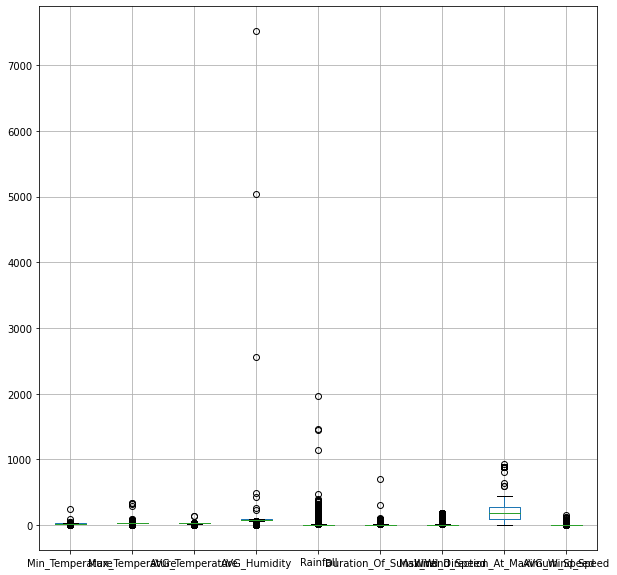

In [ ]:
text = "Min_Temperature	Max_Temperature	AVG_Temperature	AVG_Humidity Rainfall Duration_Of_Sunshine	Max_Wind_Speed	Wind_Direction_At_Maximum_Speed	AVG_Wind_Speed"
feature = text.split()
dfm.boxplot(feature,figsize=[10,10])

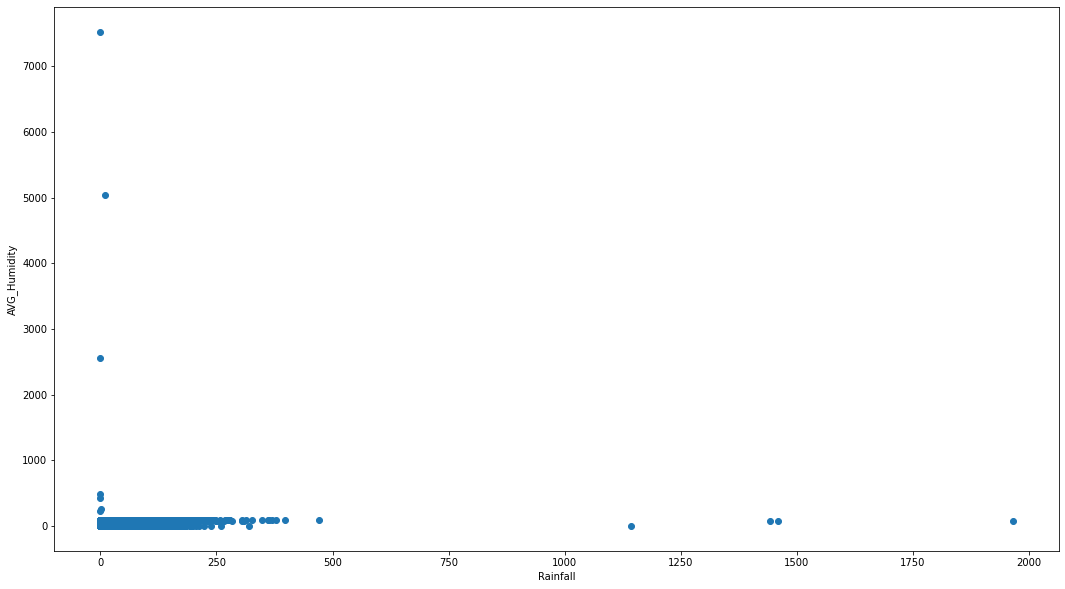

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dfm['Rainfall'],dfm['AVG_Humidity'])
 
# x-axis label
ax.set_xlabel('Rainfall')
 
# y-axis label
ax.set_ylabel('AVG_Humidity')
plt.show()

In [ ]:
for f in feature:
  z = np.abs(stats.zscore(dfm[f]))
  # print(z)
  threshold = 3
  
  # Position of the outlier
  print(np.where(z > 3))

(array([  1375,   1592,   1601, ..., 588940, 588954, 589231]),)
(array([  1376,   1492,   1560, ..., 589214, 589215, 589231]),)
(array([  1375,   1557,   1560, ..., 589232, 589249, 589257]),)
(array([100299, 127903, 141245, 248167, 248635, 253370, 362399]),)
(array([     2,    156,    314, ..., 589060, 589077, 589256]),)
(array([ 14023,  28465,  33274,  35018,  35072,  35073,  35117,  35124,
        35127,  35496,  35499,  35526,  35533,  35541,  35544,  35583,
        35597,  35604,  35626,  35651,  35657,  35674,  35707,  35752,
        35755,  35771,  35805,  35806,  35836,  36080,  36437,  36962,
        36966,  37007,  37103,  38297,  46735,  72513,  72951,  80621,
        83874, 107754, 111647, 111841, 112328, 123845, 123876, 137958,
       145587, 145597, 145632, 146511, 155631, 169434, 175689, 194880,
       199017, 241434, 282224, 299612, 299614, 299710, 299712, 299731,
       299764, 299791, 299795, 299800, 299806, 300295, 306576, 309885,
       315956, 316097, 317460, 317461

membersihkan outlier menggunakan metode iqr

In [ ]:
#IQR
iqr = {}
upper = {}
lower = {}
indexer = []
dfm_new = dfm.copy()
#menentukan sekala 
scale_raifall = 3
scale = 1.5
for f in feature:
  #menentukan nilai q1 dan q3
  
  if f == "Rainfall":
    indexer_rainfall = dfm_new[dfm_new[f]>=500].index
    print(indexer_rainfall)
    indexer = np.concatenate((indexer,indexer_rainfall))
    
  else:
    Q1 = np.percentile(dfm_new[f],25,interpolation='midpoint')
    Q3 = np.percentile(dfm_new[f],75,interpolation='midpoint')
    #menentukan nilai IQR
    iqr[f] = Q3 - Q1
    #menentukan batas atas
    batas_atas = Q3 + scale*iqr[f]
    #menentukan posisi nilai yang lebih besar atau sama dengan batas atas
    upper[f] = np.where(dfm_new[f] >= batas_atas)
    
    #menentukan batas bawah
    batas_bawah = Q1 - scale*iqr[f]
    #menentukan posisi nilai yang lebih kecil atau sama dengan batas bawah
    lower[f] = np.where(dfm_new[f] <= batas_bawah)
    
    print("IQR :",iqr[f])
    print("batas atas "+f+" :",batas_atas)
    print("batas bawah "+f+" :",batas_bawah)
    print("index length of upper :",len(upper[f][0]))
    print("index length of lower :",len(lower[f][0]))
    #karena output dari np.whare berupa posisi nilai maka batas atas dan bawah digabungkan
    #sehingga menghasilkan list posisi yang unik/tidak duplikat
    #kemudian dimasukan kedalam indexer
    indexer = np.concatenate((indexer,np.concatenate((upper[f][0],lower[f][0]))))
  print("="*100)
print("index lenght:",len(indexer))

dfm_new.drop(index = indexer,inplace=True)
dfm_new = dfm_new.reset_index()
  # dfm.drop(index = lower[f][0],inplace=True)
# print(iqr,upper,lower,sep="\n")
# display(dfm)

IQR : 2.799999999999997
batas atas Min_Temperature : 29.099999999999994
batas bawah Min_Temperature : 17.900000000000006
index length of upper : 372
index length of lower : 40271
IQR : 2.799999999999997
batas atas Max_Temperature : 36.99999999999999
batas bawah Max_Temperature : 25.800000000000004
index length of upper : 593
index length of lower : 49912
IQR : 2.099999999999998
batas atas AVG_Temperature : 31.049999999999997
batas bawah AVG_Temperature : 22.650000000000006
index length of upper : 658
index length of lower : 69966
IQR : 10.0
batas atas AVG_Humidity : 102.0
batas bawah AVG_Humidity : 62.0
index length of upper : 7
index length of lower : 53015
Int64Index([357045, 357060, 357062, 357063], dtype='int64')
IQR : 5.8
batas atas Duration_Of_Sunshine : 16.2
batas bawah Duration_Of_Sunshine : -6.999999999999999
index length of upper : 88
index length of lower : 0
IQR : 3.0
batas atas Max_Wind_Speed : 10.5
batas bawah Max_Wind_Speed : -1.5
index length of upper : 10805
index leng

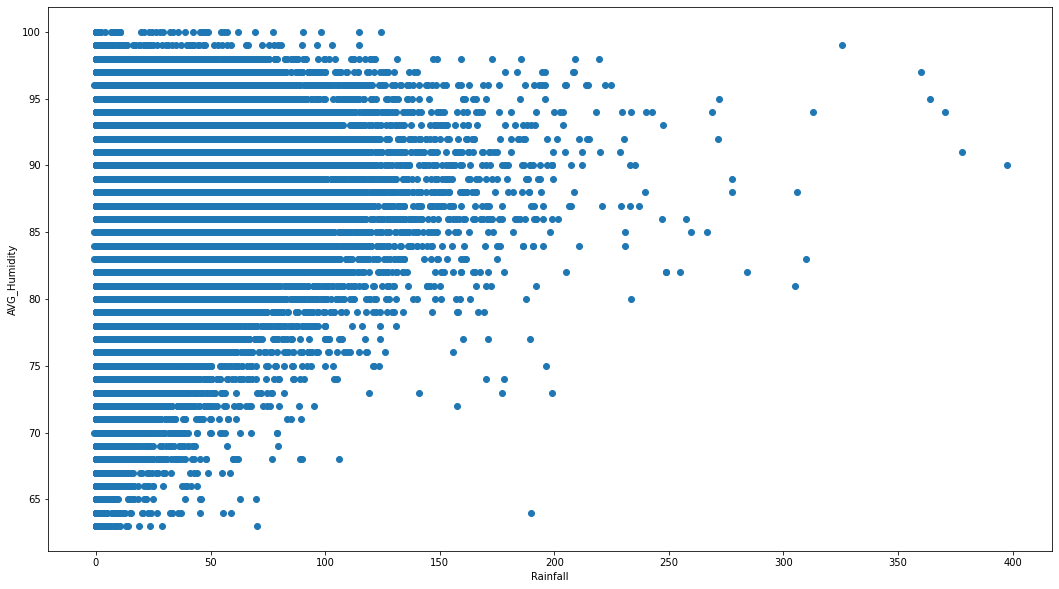

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dfm_new['Rainfall'],dfm_new['AVG_Humidity'])
 
# x-axis label
ax.set_xlabel('Rainfall')
 
# y-axis label
ax.set_ylabel('AVG_Humidity')
plt.show()

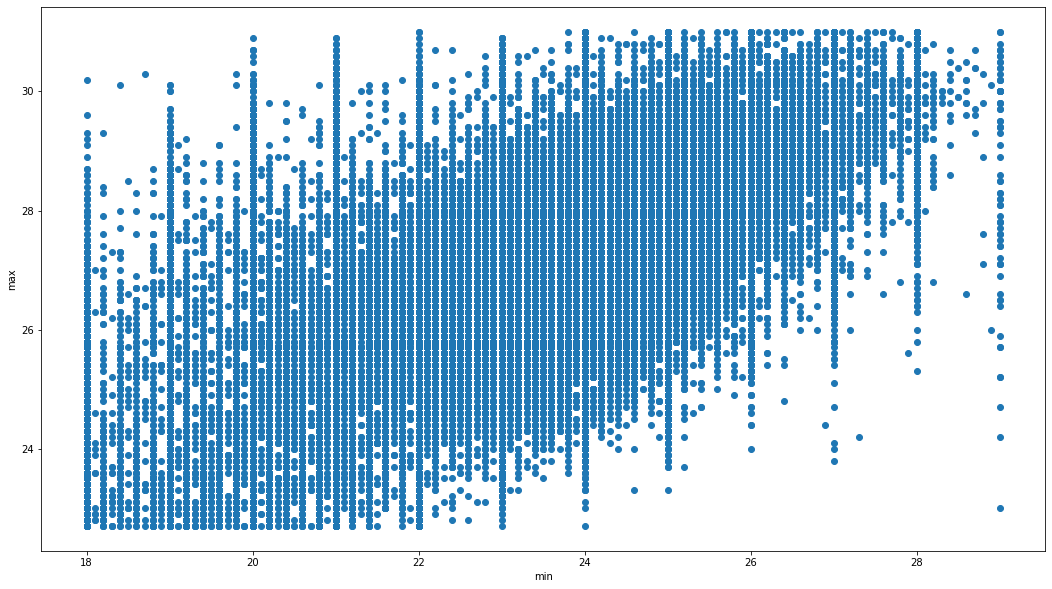

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dfm_new['Min_Temperature'],dfm_new['AVG_Temperature'])
 
# x-axis label
ax.set_xlabel('min')
 
# y-axis label
ax.set_ylabel('max')
plt.show()

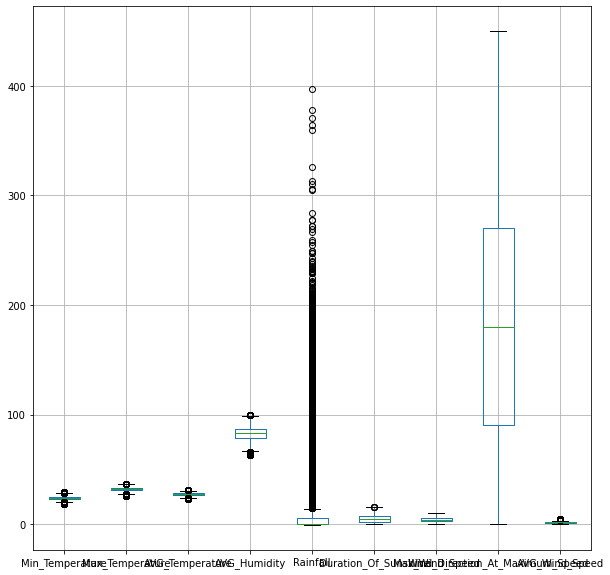

In [ ]:
dfm_new.boxplot(feature,figsize=[10,10])

In [ ]:
dfm_new

,index,Tanggal,Min_Temperature,Max_Temperature,AVG_Temperature,AVG_Humidity,Rainfall,Duration_Of_Sunshine,Max_Wind_Speed,Wind_Direction_At_Maximum_Speed,AVG_Wind_Speed,Most_Wind_Direction,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
2,2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
3,3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
4,4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,0.0,0.0,0.0,N,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,589260,27-12-2020,25.2,31.8,28.1,85.0,0.0,8.2,4.0,320.0,2.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
456544,589261,28-12-2020,26.0,32.0,28.3,86.0,0.0,1.7,4.0,270.0,1.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
456545,589262,29-12-2020,25.7,31.0,27.5,88.0,20.0,4.6,6.0,310.0,2.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
456546,589263,30-12-2020,26.0,33.0,29.2,80.0,12.8,2.4,5.0,250.0,2.0,W,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku


In [ ]:
dfm_new.shape

(456548, 20)

jalankan block code ini untuk mendownload file

In [ ]:
from google.colab import files
dfm_new.to_csv("clean_data.csv")
files.download("clean_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfm_new.corr()

,index,Min_Temperature,Max_Temperature,AVG_Temperature,AVG_Humidity,Rainfall,Duration_Of_Sunshine,Max_Wind_Speed,Wind_Direction_At_Maximum_Speed,AVG_Wind_Speed,station_id,latitude,longitude,region_id,province_id
index,1.000000,0.100253,-0.075186,0.064632,-0.102778,-0.025277,0.147414,0.120963,0.021796,0.108698,0.992695,-0.571357,0.903885,0.793537,0.796111
Min_Temperature,0.100253,1.000000,0.236268,0.639509,-0.050546,-0.080716,0.044553,0.101664,0.022474,0.092909,0.112509,-0.051085,0.119151,0.136941,0.132774
Max_Temperature,-0.075186,0.236268,1.000000,0.669929,-0.470825,-0.179935,0.252629,0.044396,-0.039890,-0.008138,-0.078838,-0.008956,-0.077687,-0.031340,-0.044300
AVG_Temperature,0.064632,0.639509,0.669929,1.000000,-0.487385,-0.190758,0.227011,0.121817,-0.029366,0.126750,0.068250,-0.052728,0.074276,0.085141,0.075892
AVG_Humidity,-0.102778,-0.050546,-0.470825,-0.487385,1.000000,0.284947,-0.343568,-0.213418,0.076288,-0.289355,-0.084008,0.253689,0.003959,0.023130,0.035968
Rainfall,-0.025277,-0.080716,-0.179935,-0.190758,0.284947,1.000000,-0.172150,-0.054259,0.048352,-0.080495,-0.020601,0.045336,-0.002570,0.004613,0.006631
Duration_Of_Sunshine,0.147414,0.044553,0.252629,0.227011,-0.343568,-0.172150,1.000000,0.133553,-0.037874,0.128190,0.130952,-0.170064,0.085388,0.070357,0.062928
Max_Wind_Speed,0.120963,0.101664,0.044396,0.121817,-0.213418,-0.054259,0.133553,1.000000,0.107348,0.605325,0.113996,-0.178736,0.070153,0.039965,0.034314
Wind_Direction_At_Maximum_Speed,0.021796,0.022474,-0.039890,-0.029366,0.076288,0.048352,-0.037874,0.107348,1.000000,0.034365,0.016786,-0.001805,0.003893,0.032329,0.030635
AVG_Wind_Speed,0.108698,0.092909,-0.008138,0.126750,-0.289355,-0.080495,0.128190,0.605325,0.034365,1.000000,0.110416,-0.175941,0.060481,0.019593,0.018106


In [ ]:
corr_matrix = dfm_new.corr()

In [ ]:
corr_matrix["Rainfall"]

index                             -0.025277
Min_Temperature                   -0.080716
Max_Temperature                   -0.179935
AVG_Temperature                   -0.190758
AVG_Humidity                       0.284947
Rainfall                           1.000000
Duration_Of_Sunshine              -0.172150
Max_Wind_Speed                    -0.054259
Wind_Direction_At_Maximum_Speed    0.048352
AVG_Wind_Speed                    -0.080495
station_id                        -0.020601
latitude                           0.045336
longitude                         -0.002570
region_id                          0.004613
province_id                        0.006631
Name: Rainfall, dtype: float64

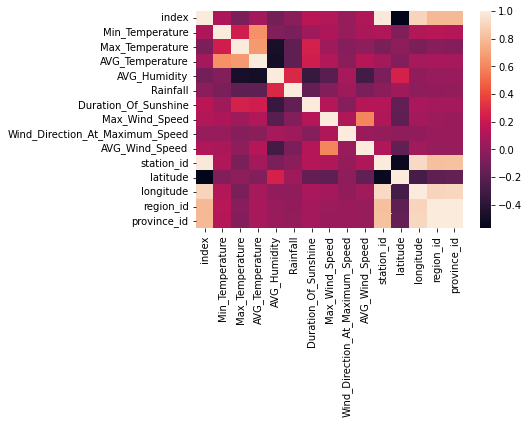

In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp
# plotting correlation heatmap
dataplot=sb.heatmap(dfm_new.corr())
  
# displaying heatmap
mp.show()

MEMBAGI DATA MENJADI BEBERAPA PROVINSI

In [ ]:
prov = {}
for p in df2['province_id']:
  prov[p] = dfm[dfm['province_id'].isin([p])]


In [ ]:
prov_id = int(input("masukan id provisi = "))
name = pd.unique(prov[prov_id]["province_name"]).tolist()
print(name)
display(prov[prov_id])

KeyboardInterrupt: ignored

In [ ]:
station = {}
for s in df3['station_id']:
  station[s] = dfm[dfm['station_id'].isin([s])]


In [ ]:
station_id = int(input("masukan id stasiun = "))

name = pd.unique(station[station_id]["station_name"])
print(name)
display(station[station_id])


In [ ]:
dfm['Tanggal'] = pd.to_datetime(dfm['Tanggal'])
tahun = pd.unique(dfm['Tanggal'].dt.year).tolist()
bulan = dfm['Tanggal'].dt.month.to_list()
print(tahun)

In [ ]:
data_y = {}
for y in tahun:
  data_y[y] = dfm[dfm['Tanggal'].dt.year == y]

In [ ]:
data_m = {}
for m in bulan:
  data_m[m] = dfm[dfm['Tanggal'].dt.month == m]

In [ ]:
print(dfm.loc[(dfm['Max_Temperature'] < 15) | (dfm['Max_Temperature']>45),'Max_Temperature'])
dfm.loc[(dfm['Max_Temperature'] < 15) |(dfm['Max_Temperature']>45),'Max_Temperature'] = dfm['Max_Temperature'].mean()

In [ ]:
dfm.max()